In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
print('Positive Values in Quantity ',sum(n>0 for n in df['Quantity']))
print('Negative Values in Quantity ',sum(n<0 for n in df['Quantity']))

Positive Values in Quantity  531285
Negative Values in Quantity  10624


In [11]:
cancel  = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancel.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [13]:
cancel[cancel['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [15]:
temp = df.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
transaction_df = temp.rename(columns={'InvoiceDate': 'Number of Products'})
transaction_df.head()

,InvoiceNo,CustomerID,Number of Products
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1


Text(0.5,1,'Product Wise Graph')

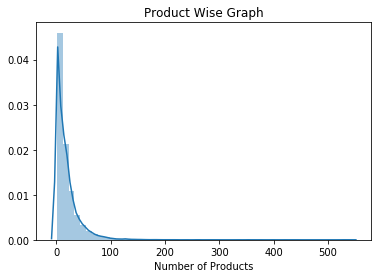

In [24]:
fig ,ax=plt.subplots()
sns.distplot(transaction_df['Number of Products'],ax=ax)
ax.set_title('Product Wise Graph')


In [18]:
df['total_cost'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


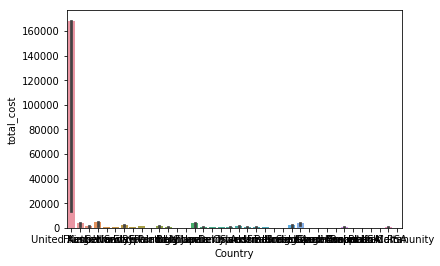

In [19]:
fig,ax = plt.subplots()
ax = sns.barplot(x='Country',y='total_cost',data=df,estimator=max,ax=ax)
plt.show()


In [25]:
uk_detail =  df[df['Country']=='United Kingdom']
uk_detail.describe()

,Quantity,UnitPrice,CustomerID,total_cost
count,495478.000000,495478.000000,361878.000000,495478.000000
mean,8.605486,4.532422,15547.871368,16.525065
std,227.588756,99.315438,1594.402590,394.839116
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,14194.000000,3.290000
50%,3.000000,2.100000,15514.000000,8.290000
75%,10.000000,4.130000,16931.000000,16.630000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [26]:
uk_detail = uk_detail[uk_detail['Quantity']>0]
uk_detail.shape

(486286, 9)

In [31]:
uk_detail.dropna(subset=['CustomerID'],inplace=True)
uk_detail.shape

(354345, 9)

In [32]:
uk_detail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
total_cost     0
dtype: int64

In [33]:
uk_detail['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [49]:
now = dt.date(2018,12,9)
print(now)

2018-12-09


In [50]:
uk_detail['date'] = uk_detail['InvoiceDate'].dt.date

In [51]:
uk_detail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_cost,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [55]:
recency_df = uk_detail.groupby(by='CustomerID',as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [56]:
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x:(now-x).days)

In [57]:
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,2882
1,12747.0,2011-12-07,2559
2,12748.0,2011-12-09,2557
3,12749.0,2011-12-06,2560
4,12820.0,2011-12-06,2560


In [58]:
recency_df.drop('LastPurchaseDate',axis=1,inplace=True)

In [73]:
#Calculating Frequency of Each Customer 
uk_detail_copy = uk_detail
uk_detail_copy.drop_duplicates(subset=['InvoiceID','CustomerID'],keep='first',inplace=True)
#drop duplicate item from dataset
freq = uk_detail_copy.groupby(by=['CustomerID'],as_index=False)['InvoiceNo'].count()
#group the Invoice No 
freq.columns = ['CustomerID','Frequency']
freq.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,1
2,12748.0,1
3,12749.0,1
4,12820.0,1


In [74]:
#Create column Total Cost
uk_detail['TotalCost'] = uk_detail['Quantity'] * uk_detail['UnitPrice']

In [77]:
monetary_df = uk_detail.groupby(by='CustomerID',as_index=False).agg({'TotalCost':'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,30.60
2,12748.0,4.95
3,12749.0,19.90
4,12820.0,13.20


# RFM TABLE

In [78]:
temp_df = recency_df.merge(freq,on='CustomerID')
temp.head()

,InvoiceNo,CustomerID,InvoiceDate
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1


In [79]:
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,2882,1,77183.60
1,12747.0,2559,1,30.60
2,12748.0,2557,1,4.95
3,12749.0,2560,1,19.90
4,12820.0,2560,1,13.20


In [80]:
cr_df = rfm_df
cr_df['Rank'] = cr_df['Monetary'].rank(ascending=0)
cr_df.head()

,CustomerID,Recency,Frequency,Monetary,Rank
0,12346.0,2882,1,77183.60,1.0
1,12747.0,2559,1,30.60,828.0
2,12748.0,2557,1,4.95,3404.0
3,12749.0,2560,1,19.90,1323.5
4,12820.0,2560,1,13.20,2508.5


In [81]:
cr_df.sort_values('Rank',ascending=True).head(10)

,CustomerID,Recency,Frequency,Monetary,Rank
0,12346.0,2882,1,77183.60,1.0
2095,15749.0,2792,1,4921.50,2.0
1683,15195.0,2559,1,3861.00,3.0
3774,18087.0,2655,1,3202.92,4.0
226,13135.0,2753,1,3096.00,5.0
3596,17846.0,2642,1,2033.10,6.0
3784,18102.0,2557,1,1950.24,7.0
2662,16532.0,2574,1,1910.40,8.0
3676,17949.0,2558,1,1314.00,9.0
2271,16000.0,2559,1,1190.40,10.0


In [92]:
quantiles = rfm_df.quantile(q=[0.25,0.50,0.75])
quantiles

,CustomerID,Recency,Frequency,Monetary,Rank
0.25,14208.0,2574.0,1.0,9.9,997.0
0.50,15569.0,2607.0,1.0,15.9,1961.0
0.75,16913.0,2699.0,1.0,25.5,2936.0


In [93]:
quantiles.to_dict()

{'CustomerID': {0.25: 14208.0, 0.5: 15569.0, 0.75: 16913.0},
 'Recency': {0.25: 2574.0, 0.5: 2607.0, 0.75: 2699.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 9.9, 0.5: 15.9, 0.75: 25.5},
 'Rank': {0.25: 997.0, 0.5: 1961.0, 0.75: 2936.0}}

In [94]:
def Rscore(x,p,d):
    if x<= d[p][0.25]:
        return 4
    elif x<=d[p][0.25]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1
def FMScore(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.5]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4

In [95]:
rfm_segmentation = rfm_df
#dividing the segment
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(Rscore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [96]:
rfm_segmentation.head()

,CustomerID,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile
0,12346.0,2882,1,77183.60,1.0,1,1,4
1,12747.0,2559,1,30.60,828.0,4,1,4
2,12748.0,2557,1,4.95,3404.0,4,1,1
3,12749.0,2560,1,19.90,1323.5,4,1,3
4,12820.0,2560,1,13.20,2508.5,4,1,2


In [97]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,CustomerID,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,12346.0,2882,1,77183.60,1.0,1,1,4,114
1,12747.0,2559,1,30.60,828.0,4,1,4,414
2,12748.0,2557,1,4.95,3404.0,4,1,1,411
3,12749.0,2560,1,19.90,1323.5,4,1,3,413
4,12820.0,2560,1,13.20,2508.5,4,1,2,412


In [99]:
rfm_segmentation[rfm_segmentation['RFMScore']=='414'].sort_values('Monetary', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,Rank,R_Quartile,F_Quartile,M_Quartile,RFMScore
1683,15195.0,2559,1,3861.00,3.0,4,1,4,414
3784,18102.0,2557,1,1950.24,7.0,4,1,4,414
2662,16532.0,2574,1,1910.40,8.0,4,1,4,414
3676,17949.0,2558,1,1314.00,9.0,4,1,4,414
2271,16000.0,2559,1,1190.40,10.0,4,1,4,414
2512,16333.0,2564,1,544.32,21.0,4,1,4,414
191,13089.0,2559,1,525.60,23.0,4,1,4,414
801,13953.0,2564,1,500.00,26.5,4,1,4,414
1684,15197.0,2567,1,419.40,33.0,4,1,4,414
694,13798.0,2558,1,408.00,35.0,4,1,4,414


# Applying K Means Clustering

In [109]:
uk_detail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01,54.08
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom,2010-12-01,204.00
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom,2010-12-01,350.40
82,536376,22114,HOT WATER BOTTLE TEA AND SYMPATHY,48,2010-12-01 09:32:00,3.45,15291.0,United Kingdom,2010-12-01,165.60


In [110]:
uk_detail.drop('total_cost',axis=1,inplace=True)
retail_cost = uk_detail.groupby(by='CustomerID').sum()

ValueError: labels ['total_cost'] not contained in axis

In [111]:
retail_cost.drop('UnitPrice',axis=1,inplace=True)

ValueError: labels ['UnitPrice'] not contained in axis

In [112]:
X = retail_cost.values

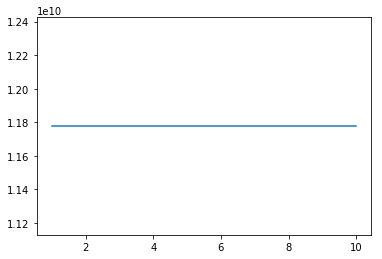

In [113]:
from sklearn.cluster import KMeans
ws = []

for i in range(1,11):
    km = KMeans(n_clusters=1,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(X)
    ws.append(km.inertia_)
plt.plot(range(1,11),ws)
plt.show()

In [115]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
retail_cost['cluster']=kmeans.fit_predict(X)
y_kmeans = kmeans.fit_predict(X)

In [116]:
retail_cost[retail_cost['cluster']==2]

,Quantity,TotalCost,cluster
CustomerID,,,
12747.0,12,30.60,2
12748.0,1,4.95,2
12749.0,2,19.90,2
12820.0,24,13.20,2
12821.0,8,19.92,2
12822.0,24,20.40,2
12823.0,40,306.00,2
12824.0,12,5.04,2
12826.0,6,17.70,2


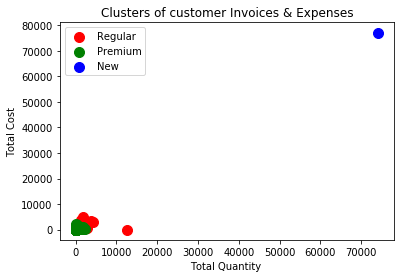

In [117]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label='Regular')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label='Premium')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label='New')

plt.title('Clusters of customer Invoices & Expenses')
plt.xlabel('Total Quantity ')
plt.ylabel('Total Cost')
plt.legend()
plt.show()